In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
W_IDOO = np.array([-0.144101645, 0.992444808, 0.990794517, 0.902445699, 0.626656476, 0.842831761, 1.464455695, 0.671030691, 0.563978899, 0.483953495,
0.490252155, 0.952698571, 0.910104533, 0.418079914, 0.589748971, 0.414729844, 1.064280161, 0.419139603, 1.01105275,
1.083745295, 0.398469781, 1.009733016, 1.013567823, 0.427841828, 0.45009467, 1.786499381, 0.382942062, 0.843668102,
0.520250458, 0.651532615, 0.976594671, 0.857319156, 0.805426553, 0.963616326, 1.017084869, 0.571009015, 0.552130476,
0.787818571, 0.297889048, 0.680741271,  0.404473684, 0.980688298, 0.606393138, 0.400912217, 0.746469888, 1.104737879, 
1.027370345])

In [4]:
BIAS_IDO = -0.144101645
W_IDO = np.array([0.992444808, 0.990794517, 0.902445699, 0.626656476, 0.842831761, 1.464455695, 0.671030691, 0.563978899, 0.483953495,
0.490252155, 0.952698571, 0.910104533, 0.418079914, 0.589748971, 0.414729844, 1.064280161, 0.419139603, 1.01105275,
1.083745295, 0.398469781, 1.009733016, 1.013567823, 0.427841828, 0.45009467, 1.786499381, 0.382942062, 0.843668102,
0.520250458, 0.651532615, 0.976594671, 0.857319156, 0.805426553, 0.963616326, 1.017084869, 0.571009015, 0.552130476,
0.787818571, 0.297889048, 0.680741271,  0.404473684, 0.980688298, 0.606393138, 0.400912217, 0.746469888, 1.104737879, 
1.027370345])

In [5]:
woe = list()
woe.append({0 : -0.1065122, 1 : 0.4222871, 2 : 1.036387})
woe.append({0 : -0.2378335, 1 :  0.07023064, 2 : 0.4664402, 3 : 0.8353388})
woe.append({0 : -0.2502094, 1 : 0.1084158, 2 : 0.4449419, 3 : 0.8486431})
woe.append({0 : -1.561799, 1 : 0.1927473})
woe.append({0 : -1.379848, 1 : 0.1049342})
woe.append({0 : -0.1792184, 1 : 0.3162232, 2 : 0.8137222})
woe.append({0 : -1.700863, 1 : -0.6177194-0.0654258, 2 : -0.065425, 3 : 0.2745747})
woe.append({0 : 0.216078, 1 : -1.311125})
woe.append({0 : 0.524814, 1 : 0.05988731, 2 : -0.5418809, 3 : -0.9405198, 4 : -1.518476})
woe.append({0 : 0.1374931, 1 : -1.659856})
woe.append({0 : 0.5465608, 1 : -0.4838124})
woe.append({0 : -0.3062909, 1 : 0.3298987})
woe.append({0 : 0.08199285, 1 : -2.124495})
woe.append({0 : 0.1093187, 1 : -1.424221})
woe.append({0 : 0.3449535, 1 : -0.5910473})
woe.append({0 : -0.160297, 1 : 0.6957824})
woe.append({0 : 0.1609215, 1 : -0.8663216})
woe.append({0 : 0.1290762, 1 : -0.7820831})
woe.append({0 : -0.2949417, 1 : 0.08886915, 2 : 0.4163132, 3 : 0.6725987})
woe.append({0 : 0.516639, 1 : 0.2083162, 2 : -0.5795477})
woe.append({0 : -0.1920321, 1 : 0.3012856, 2 : 0.6515306})
woe.append({0 : -0.1876548, 1 : 0.3290533, 2 : 0.6709004})
woe.append({0 : 0.2165495, 1 : -1.166767})
woe.append({0 : 0.2794411, 1 : -0.6067098, 2 : -1.151186, 3 : -1.825563})
woe.append({0 : -0.2030622, 1 : -0.04852432, 2 : 0.4069042, 3 : 0.9553732})
woe.append({0 : 0.09477841, 1 : -1.805899})
woe.append({0 : 0.1604755, 1 : -0.6589255})
woe.append({0 : 0.1395371, 1 : -1.171284})
woe.append({0 : 0.1218356, 1 : -0.8296453})
woe.append({0 : 0.1361255, 1 : -0.7893362})
woe.append({0 : 0.1822689, 1 : -0.7644427})
woe.append({0 : 0.1577876, 1 : -0.7376502})
woe.append({0 : -0.1769525, 1 : 0.5678826})
woe.append({0 : 0.2409278, 1 : -0.4604165})
woe.append({0 : -0.1910219, 1 : 0.5771964})
woe.append({0 : -0.1489811, 1 : 0.7453961})
woe.append({0 : -0.2004717, 1 : 0.1067575, 2 : 0.4495568, 3 : 0.8640923, 4 : 1.218832})
woe.append({0 : 0.08777444, 1 : -1.67856})
woe.append({0 : 0.09176626, 1 : -1.127734})
woe.append({0 : 0.1518284, 1 : -0.9775437, 2 : -1.730443, 3 : -2.832306})
woe.append({0 : 0.2647488, 1 : -0.08369122, 2 : -0.2568607, 3 : -0.4864309, 4 : -0.6311115})
woe.append({0 : 0.2156865, 1 : -0.6749567})
woe.append({0 : 0.1408352, 1 : -0.4848812, 2 : -1.074343, 3 : -1.521847, 4 : -2.011364})
woe.append({0 : 0.1472873, 1 : -0.8836176})
woe.append({0 : -0.1418125, 1 : -0.02399424, 2 : 0.2289521, 3 : 0.6984089, 4 : 1.117891})
woe.append({0 : -0.2710622, 1 : 0.3726461})

In [6]:
import copy
woe_fixed = copy.deepcopy(woe)
for d in woe_fixed:
    v_sorted = list(d.values())
    v_sorted.sort()
    for i in range(len(v_sorted)):
        d[i] = v_sorted[i]
        

# IDO

In [7]:
df = pd.read_csv('IDO.csv', sep=';')

In [8]:
df.shape

(2582857, 48)

(array([1.05853e+05, 9.94050e+04, 7.55190e+04, 6.53060e+04, 5.72460e+04,
        5.34020e+04, 4.94760e+04, 4.63260e+04, 4.61750e+04, 4.15810e+04,
        4.06240e+04, 4.17670e+04, 3.76990e+04, 3.85420e+04, 3.51910e+04,
        3.44440e+04, 4.30020e+04, 3.03920e+04, 3.47640e+04, 3.36600e+04,
        3.14710e+04, 3.44500e+04, 2.76320e+04, 3.81580e+04, 2.84510e+04,
        3.21740e+04, 2.87630e+04, 2.44800e+04, 3.43400e+04, 2.58950e+04,
        2.42700e+04, 2.76260e+04, 6.77950e+04, 3.12660e+04, 2.04110e+04,
        2.69570e+04, 1.78010e+04, 2.92270e+04, 3.14960e+04, 2.06410e+04,
        2.66760e+04, 1.68310e+04, 1.53640e+04, 2.14370e+04, 2.71770e+04,
        8.57650e+04, 1.39230e+04, 1.82240e+04, 1.28930e+04, 3.51710e+04,
        1.11570e+04, 3.29730e+04, 2.50690e+04, 1.54550e+04, 1.23800e+04,
        2.50550e+04, 1.17390e+04, 9.49300e+03, 1.55450e+04, 1.47650e+04,
        3.53350e+04, 1.57680e+04, 9.81400e+03, 1.12290e+04, 9.46700e+03,
        8.74710e+04, 1.79330e+04, 1.44160e+04, 2.20

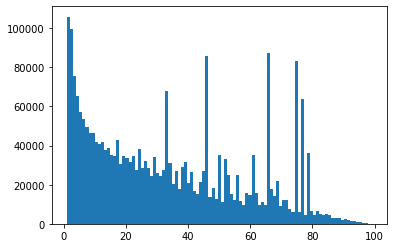

In [33]:
df.IDO.value_counts()
plt.hist(df.IDO, bins=99)

In [9]:
ido_df = df.drop({'IDO', 'FAKE_ID_FIRM'}, axis=1)

In [10]:
ido_df_woe = ido_df.copy()

In [11]:
for i in range(1, 47):
    temp = "FACT_" + str(i)
    for k, v in woe_fixed[i - 1].items():
        ido_df_woe[temp].replace({k : v}, inplace=True)

In [12]:
np_ido_df_woe = ido_df_woe.to_numpy()

In [13]:
model_ido = LogisticRegression()
model_ido.coef_ = W_IDO.reshape(1, -1)
model_ido.intercept_ = BIAS_IDO
model_ido.penalty = 'None'
model_ido.classes_ = np.array([-1, 1])
ido_res = model_ido.predict(np_ido_df_woe)

In [14]:
my_ido = model_ido.predict_proba(np_ido_df_woe)[:, 1]

In [15]:
def IDO_COUNT(obj):
    d_pr = np.dot(obj, W_IDO) + BIAS_IDO
    Y = 1 / (1 + math.exp(-1 * d_pr))
    return Y

In [119]:
sda = list()
for i in range(ido_df_woe.shape[0]):
    row = np.resize(ido_df_woe.iloc[i].to_numpy(), (46, ))
    sda.append(IDO_COUNT(row))

In [16]:
sda_np = np.array(sda)

NameError: name 'sda' is not defined

(array([1.05853e+05, 9.94050e+04, 7.55190e+04, 6.53060e+04, 5.72460e+04,
        5.34020e+04, 4.94760e+04, 4.63260e+04, 4.61750e+04, 4.15810e+04,
        4.06240e+04, 4.17670e+04, 3.76990e+04, 3.85420e+04, 3.51910e+04,
        3.44440e+04, 4.30020e+04, 3.03920e+04, 3.47640e+04, 3.36600e+04,
        3.14710e+04, 3.44500e+04, 2.76320e+04, 3.81580e+04, 2.84510e+04,
        3.21740e+04, 2.87630e+04, 2.44800e+04, 3.43400e+04, 2.58950e+04,
        2.42700e+04, 2.76260e+04, 6.77950e+04, 3.12660e+04, 2.04110e+04,
        2.69570e+04, 1.78010e+04, 2.92270e+04, 3.14960e+04, 2.06410e+04,
        2.66760e+04, 1.68310e+04, 1.53640e+04, 2.14370e+04, 2.71770e+04,
        8.57650e+04, 1.39230e+04, 1.82240e+04, 1.28930e+04, 0.00000e+00,
        3.51710e+04, 1.11570e+04, 3.29730e+04, 2.50690e+04, 1.54550e+04,
        1.23800e+04, 2.50550e+04, 1.17390e+04, 9.49300e+03, 1.55450e+04,
        1.47650e+04, 3.53350e+04, 1.57680e+04, 9.81400e+03, 1.12290e+04,
        9.46700e+03, 8.74710e+04, 1.79330e+04, 1.44

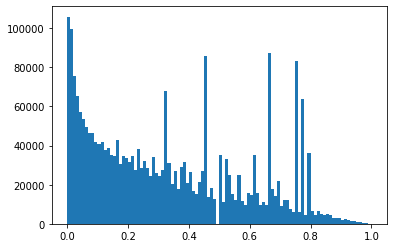

In [17]:
ido_prec = df['IDO'].to_numpy()
plt.hist((ido_prec - 1)/98, bins=100)

(array([159812.,  85192.,  70277.,  61278.,  57534.,  52480.,  49210.,
         46665.,  46651.,  41655.,  44405.,  40531.,  38992.,  38486.,
         37598.,  35779.,  44209.,  31006.,  36147.,  34133.,  34037.,
         34074.,  29884.,  38013.,  30231.,  32807.,  28707.,  26301.,
         32191.,  31054.,  22567.,  32514.,  73698.,  25674.,  25557.,
         29455.,  18941.,  33283.,  23416.,  25484.,  32267.,  15467.,
         17502.,  16499.,  34480.,  16731.,  90658.,  15879.,  16100.,
         37554.,  12246.,  32219.,  20404.,  33860.,  18412.,  14841.,
         21094.,  12632.,  15536.,  16228.,  11126.,  48538.,  15877.,
          9295.,  14887.,   8140.,   9026., 114244.,  10161.,  25290.,
         11513.,  11022.,  15416.,   8737.,   5004.,   8800.,   7662.,
          8441.,   5120.,   5177.,   5182.,   5677.,   4322.,   7653.,
          4351.,   5350.,   3418.,   4079.,   2856.,   3283.,   2334.,
          2180.,   2043.,   1542.,   1342.,   1119.,    836.,    618.,
      

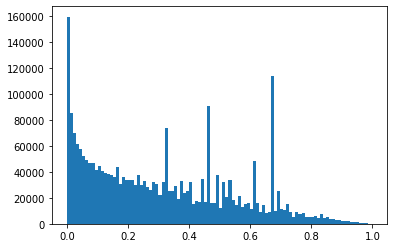

In [18]:
plt.hist(my_ido, bins=100)

In [19]:
import shap


In [21]:
explainer = shap.Explainer(model_ido, np_ido_df_woe)
shap_values = explainer(np_ido_df_woe)

Linear explainer: 2582858it [01:21, 27065.59it/s]                               


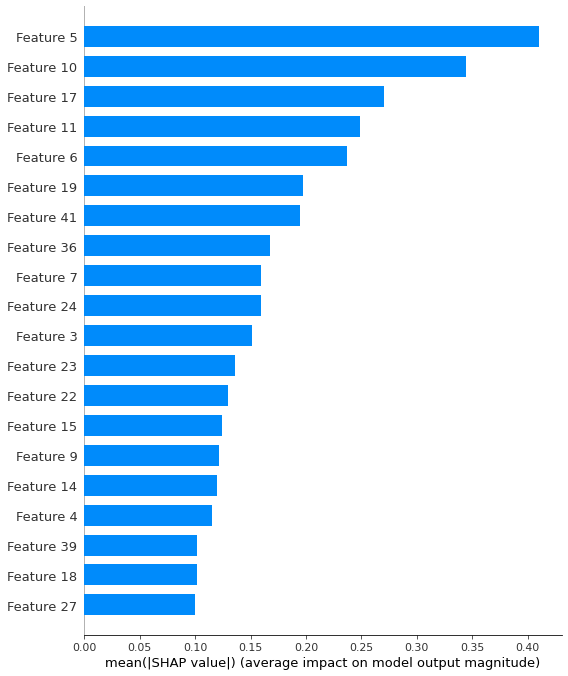

In [22]:
shap.summary_plot(shap_values, np_ido_df_woe, plot_type="bar")

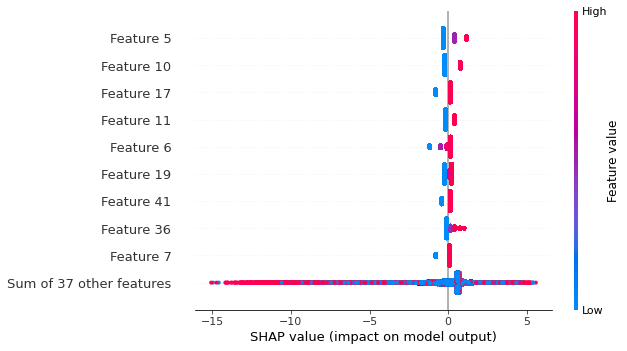

In [23]:
shap.plots.beeswarm(shap_values)

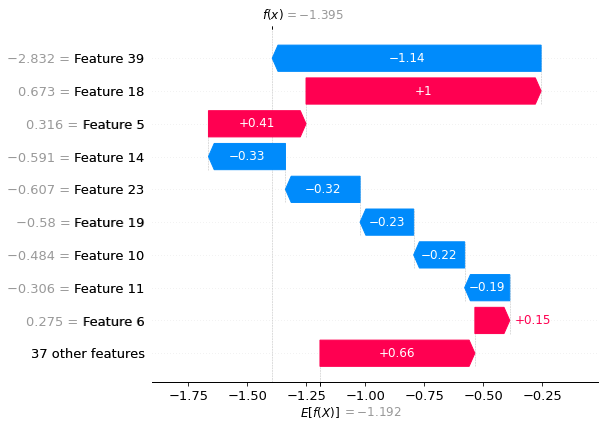

In [25]:
shap.plots.waterfall(shap_values[0])

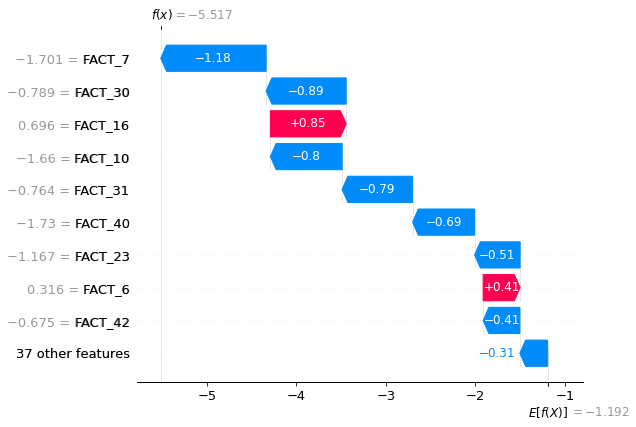

In [68]:
shap.plots.waterfall(shap_values[2582856])

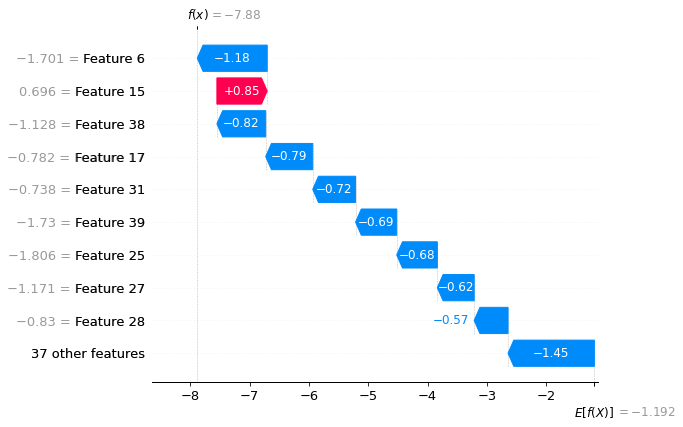

In [41]:
for i in range(df.shape[0]):
    if df.iloc[i].IDO == 1:
        shap.plots.waterfall(shap_values[i])
        break

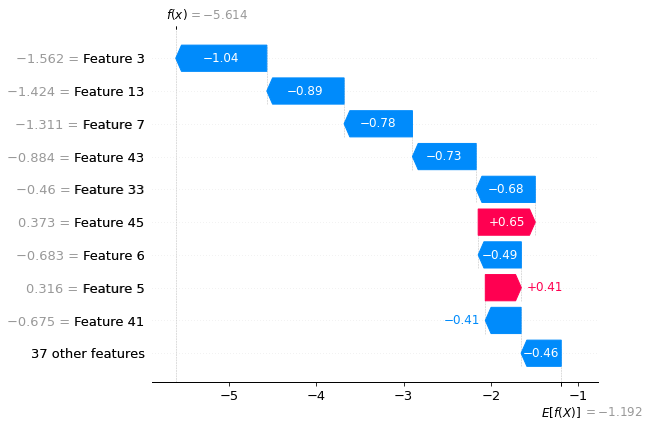

In [46]:
shap.plots.waterfall(shap_values[25])

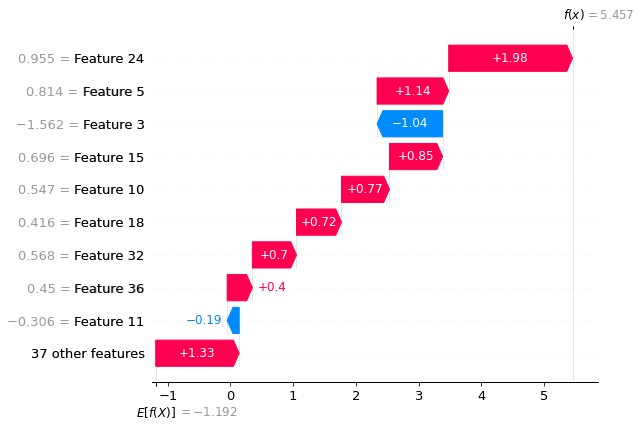

In [45]:
for i in range(df.shape[0]):
    if df.iloc[i].IDO == 99:
        shap.plots.waterfall(shap_values[i])
        break

# IFR

In [5]:
df2 = pd.read_csv('IFR.csv', sep=';')

In [55]:
W_IFR = np.array([-0.0291542161270472, 0.87964644435676, 1.06010370741674, 1.00440289769191, 0.977154713557005, 1.03748019442488,
1.06949509385102, 1.33673588726159, 1.09815501960902, 0.394515725983641, 0.744168831459236, 0.799984448011489, 0.795181696679946, 0.885120291795842, 0.775784442257758, 0.977514144660556, 0.822890150335711, 1.00799474296071, 0.832034838240526])

In [69]:
r = np.resize(df2.iloc[0].to_numpy(), (19, ))
r[0] = 1
r

array([1, 0, 2, 2, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 1, 0, 2, 0, 0])

In [70]:
def IFR_COUNT(obj):
    prob_raw = 1 / (1 + math.exp(-np.dot(obj, W_IFR)))
    